<a href="https://colab.research.google.com/github/misfitclovers/PHYS3025Work/blob/main/Astro_Hw_1_Question_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Python standard library
import time
import warnings

# Third-party software
import numpy as np

# Astropy
from astropy import coordinates as coord
from astropy import units as u
from astropy.table import Table

# Astroquery. This tutorial requires 0.3.5 or greater.
!pip install astroquery #note we need to install it manually using !pip install
import astroquery
from astroquery.simbad import Simbad
from astroquery.vo_conesearch import conf, conesearch, vos_catalog
from astroquery.vizier import Vizier
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
v = Vizier(columns=['Vmag', 'B-V', 'Plx', 'e_Plx','SpType' ],
          column_filters={'VMag': '!=', 'B-V' : '!=', 'Plx' : '!=', 'e_Plx' :'!=', 'SpType': '!='}, row_limit=-1)
result = v.query_constraints(catalog = 'V/137D')
data = result[0]
print(data)

 Vmag  B-V    Plx   e_Plx      SpType    
 mag   mag    mas    mas                 
----- ------ ------ ----- ---------------
 9.27  0.999  20.85  1.13            K3 V
 6.61 -0.019   2.26  0.36             B8V
 8.06  0.370   7.45  0.77            F0 V
 9.64  0.740  17.28  1.16             K0V
 8.59  0.489  10.83  1.00            F6 V
 7.34  0.081   4.18  0.60              A2
 7.25  1.200   4.86  0.67              K0
 8.15  0.425   7.33  0.75            F3 V
11.03  1.567  22.31  2.06             K5V
 6.53  0.955   4.01  0.35           G8III
  ...    ...    ...   ...             ...
 9.20  0.698  18.84  0.95             G5V
 4.49 -0.075   8.74  0.18             B8V
 7.70  1.420 159.48  6.61           K7.0V
 7.52  0.412  11.37  0.57          F3/4IV
10.57  1.375  38.26  3.46             M0V
10.28  0.990  14.34  1.82              K5
 9.17  0.104   1.82  2.68             A0V
 8.38 -0.022   2.98  1.46           B9III
 8.55  0.061   0.85  1.94           B9.5V
 7.62 -0.062   1.78  1.47 A0.     

In [14]:
data_clean = data[data['e_Plx']/data['Plx']<0.05]

In [27]:
d=1/data_clean['Plx']*1e3

Mv = data_clean['Vmag'] + 5 - (5*np.log10(d))

<ipython-input-27-8c5d3731af19>:3: RuntimeWarning: invalid value encountered in log10
  Mv = data_clean['Vmag'] + 5 - (5*np.log10(d))


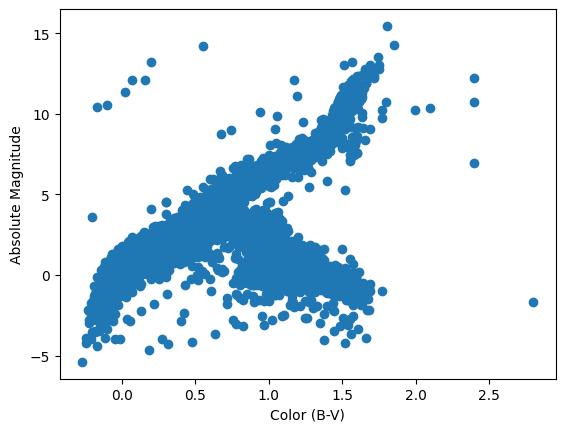

In [38]:
plt.scatter(data_clean['B-V'], Mv)
plt.xlabel("Color (B-V)")
plt.ylabel("Absolute Magnitude")
plt.show()

To make the plot into a Luminosity vs Temperature plot, you'd repeat the same process but add in arrays for the Luminosity and Temperature, both of which are in the Vizier catalog and plot the Temperature class on the x axis and the luminosity on the y